## Python notebook 
V nasledujúcom notebooku sú popísané Python metódy použité pre vizualizáciu analyzovaných dát. Obsah notebooku je nasledujúci:
1. Import potrebných knižníc
2. Načítanie a spracovanie tabuľky
3. Vizualizácia

# 1. Import potrebných knižníc

In [1]:
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# 2. Načítanie a spracovanie tabuľky
Načítame výstupnú tabuľku pre analyzované dáta, odstránime nepotrebné atribúty a pridáme stĺpce day a hour. Následne dáta delíme podľa atribútu tweek_sign a vizualizujeme.

In [2]:
#nacitanie vystupnej tab.
data = pd.read_csv("vyst_tab_2016.csv")

In [3]:
#uprava vyst. tab.
data = data.drop(['image', 'event', 'second', 'milisecond', 'tweek', 'f_min<2kHz'], axis = 1)
data

,date,tweek_sign
0,20160101_004244,2
1,20160101_011745,3
2,20160101_012246,3
3,20160101_014747,2
4,20160101_020247,2
...,...,...
207576,20161231_235351,1
207577,20161231_235351,3
207578,20161231_235851,3
207579,20161231_235851,2


In [4]:
#vytvorenie novych stlpcov hodina a den
data['month'] = data['date'].str.split("_", 1).str[0].str[4:]
data['hour'] = data['date'].str.split("_", 1).str[1].str[:2]
data = data.drop(['date'], axis = 1)

In [5]:
data['day'] = (data['month'] != data['month'].shift(1)).cumsum()
data

,tweek_sign,month,hour,day
0,2,0101,00,1
1,3,0101,01,1
2,3,0101,01,1
3,2,0101,01,1
4,2,0101,02,1
...,...,...,...,...
207576,1,1231,23,269
207577,3,1231,23,269
207578,3,1231,23,269
207579,2,1231,23,269


# 3. Vizualizácia

Grafy sú konštruované nasledovne:

x os - Hodiny

y os - Dni

z os - Početnosť

In [6]:
tweek1 = data[(data['tweek_sign'] == 1)]
tweek1 = tweek1.reset_index()

In [7]:
#vytvorenie dayhour stlpca
tweek1['day_hour'] = tweek1['day'].astype(str) + "-" + tweek1['hour'].astype(str)

In [8]:
tweek1['hour'] = tweek1['hour'].astype('int64')

In [9]:
tweek1.dtypes

index          int64
tweek_sign     int64
month         object
hour           int64
day            int64
day_hour      object
dtype: object

In [10]:
tweek1

,index,tweek_sign,month,hour,day,day_hour
0,5,1,0101,2,1,1-02
1,10,1,0101,2,1,1-02
2,15,1,0101,3,1,1-03
3,16,1,0101,4,1,1-04
4,20,1,0101,15,1,1-15
...,...,...,...,...,...,...
43843,207537,1,1231,22,269,269-22
43844,207538,1,1231,22,269,269-22
43845,207544,1,1231,22,269,269-22
43846,207567,1,1231,23,269,269-23


In [11]:
tweek1['Counts'] = tweek1.groupby(['day_hour'])['tweek_sign'].transform('count')

In [12]:
tweek1 = tweek1.drop_duplicates(subset=['day_hour'])

In [13]:
tweek1.dtypes

index          int64
tweek_sign     int64
month         object
hour           int64
day            int64
day_hour      object
Counts         int64
dtype: object

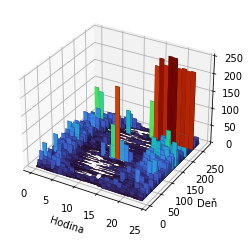

In [16]:
#vizualizacia
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm

fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')

xpos = tweek1['hour']
ypos = tweek1['day']
zpos = np.zeros(4336)

dx = np.ones(4336)
dy = np.ones(4336)
dz = tweek1['Counts']

cmap = cm.get_cmap('turbo')
max_height = np.max(dz)
min_height = np.min(dz)
rgba = [cmap((k-min_height)/max_height) for k in dz] 

plt.xlabel('Hodina')
plt.ylabel('Deň')

ax1.bar3d(xpos, ypos, zpos, dx, dy, dz, color=rgba)
plt.savefig('plots/tweek1')
plt.show()

In [17]:
tweek2 = data[(data['tweek_sign'] == 2)]
tweek2 = tweek2.reset_index()
tweek2['day_hour'] = tweek2['day'].astype(str) + "-" + tweek2['hour'].astype(str)
tweek2['hour'] = tweek2['hour'].astype('int64')
tweek2['Counts'] = tweek2.groupby(['day_hour'])['tweek_sign'].transform('count')
tweek2 = tweek2.drop_duplicates(subset=['day_hour'])
tweek2

,index,tweek_sign,month,hour,day,day_hour,Counts
0,0,2,0101,0,1,1-00,1
1,3,2,0101,1,1,1-01,1
2,4,2,0101,2,1,1-02,4
6,12,2,0101,3,1,1-03,1
7,17,2,0101,4,1,1-04,3
...,...,...,...,...,...,...,...
43850,207403,2,1231,19,269,269-19,11
43861,207440,2,1231,20,269,269-20,15
43876,207479,2,1231,21,269,269-21,9
43885,207513,2,1231,22,269,269-22,11


In [19]:
tweek2.count()

index         3088
tweek_sign    3088
month         3088
hour          3088
day           3088
day_hour      3088
Counts        3088
dtype: int64

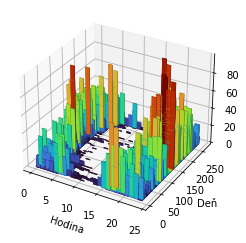

In [20]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm

fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')

xpos = tweek2['hour']
ypos = tweek2['day']
zpos = np.zeros(3088)

dx = np.ones(3088)
dy = np.ones(3088)
dz = tweek2['Counts']

cmap = cm.get_cmap('turbo')
max_height = np.max(dz)
min_height = np.min(dz)
rgba = [cmap((k-min_height)/max_height) for k in dz] 

plt.xlabel('Hodina')
plt.ylabel('Deň')

ax1.bar3d(xpos, ypos, zpos, dx, dy, dz, color=rgba)
plt.savefig('plots/tweek2')
plt.show()

In [21]:
tweek3 = data[(data['tweek_sign'] == 3)]
tweek3 = tweek3.reset_index()
tweek3['day_hour'] = tweek3['day'].astype(str) + "-" + tweek3['hour'].astype(str)
tweek3['hour'] = tweek3['hour'].astype('int64')
tweek3['Counts'] = tweek3.groupby(['day_hour'])['tweek_sign'].transform('count')
tweek3 = tweek3.drop_duplicates(subset=['day_hour'])
tweek3.count()

index         2741
tweek_sign    2741
month         2741
hour          2741
day           2741
day_hour      2741
Counts        2741
dtype: int64

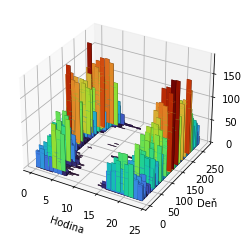

In [22]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm

fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')

xpos = tweek3['hour']
ypos = tweek3['day']
zpos = np.zeros(2741)

dx = np.ones(2741)
dy = np.ones(2741)
dz = tweek3['Counts']

cmap = cm.get_cmap('turbo')
max_height = np.max(dz)
min_height = np.min(dz)
rgba = [cmap((k-min_height)/max_height) for k in dz] 

plt.xlabel('Hodina')
plt.ylabel('Deň')

ax1.bar3d(xpos, ypos, zpos, dx, dy, dz, color=rgba)
plt.savefig('plots/tweek3')
plt.show()

In [23]:
tweek4 = data[(data['tweek_sign'] == 4)]
tweek4 = tweek4.reset_index()
tweek4['day_hour'] = tweek4['day'].astype(str) + "-" + tweek4['hour'].astype(str)
tweek4['hour'] = tweek4['hour'].astype('int64')
tweek4['Counts'] = tweek4.groupby(['day_hour'])['tweek_sign'].transform('count')
tweek4 = tweek4.drop_duplicates(subset=['day_hour'])
tweek4.count()

index         2248
tweek_sign    2248
month         2248
hour          2248
day           2248
day_hour      2248
Counts        2248
dtype: int64

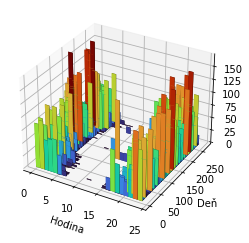

In [24]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm

fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')

xpos = tweek4['hour']
ypos = tweek4['day']
zpos = np.zeros(2248)

dx = np.ones(2248)
dy = np.ones(2248)
dz = tweek4['Counts']

cmap = cm.get_cmap('turbo')
max_height = np.max(dz)
min_height = np.min(dz)
rgba = [cmap((k-min_height)/max_height) for k in dz] 

plt.xlabel('Hodina')
plt.ylabel('Deň')

ax1.bar3d(xpos, ypos, zpos, dx, dy, dz, color=rgba)
plt.savefig('plots/tweek4')
plt.show()

In [25]:
data1 = pd.read_csv("result_2016.csv")

In [28]:
data1 = data1.drop(['org_img', 'image', 'event', 'second', 'milisecond', 'tweek', 'f_min<2kHz'], axis = 1)
data1

,date,tweek_sign
0,20160101_000242,0
1,20160101_000242,0
2,20160101_000242,0
3,20160101_000242,0
4,20160101_000242,0
...,...,...
4417691,20161231_235851,0
4417692,20161231_235851,0
4417693,20161231_235851,0
4417694,20161231_235851,2


In [29]:
data1['month'] = data1['date'].str.split("_", 1).str[0].str[4:]
data1['hour'] = data1['date'].str.split("_", 1).str[1].str[:2]
data1 = data1.drop(['date'], axis = 1)

In [30]:
data1['day'] = (data1['month'] != data1['month'].shift(1)).cumsum()
data1

,tweek_sign,month,hour,day
0,0,0101,00,1
1,0,0101,00,1
2,0,0101,00,1
3,0,0101,00,1
4,0,0101,00,1
...,...,...,...,...
4417691,0,1231,23,269
4417692,0,1231,23,269
4417693,0,1231,23,269
4417694,2,1231,23,269


In [31]:
spheric = data1[(data1['tweek_sign'] == 0)]
spheric = spheric.reset_index()
spheric['day_hour'] = spheric['day'].astype(str) + "-" + spheric['hour'].astype(str)
spheric['hour'] = spheric['hour'].astype('int64')
spheric['Counts'] = spheric.groupby(['day_hour'])['tweek_sign'].transform('count')
spheric = spheric.drop_duplicates(subset=['day_hour'])
spheric.count()

index         6353
tweek_sign    6353
month         6353
hour          6353
day           6353
day_hour      6353
Counts        6353
dtype: int64

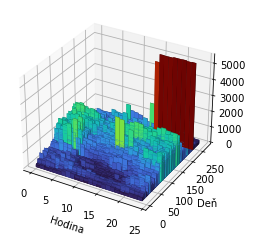

In [32]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm

fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')

xpos = spheric['hour']
ypos = spheric['day']
zpos = np.zeros(6353)

dx = np.ones(6353)
dy = np.ones(6353)
dz = spheric['Counts']

cmap = cm.get_cmap('turbo')
max_height = np.max(dz)
min_height = np.min(dz)
rgba = [cmap((k-min_height)/max_height) for k in dz] 

plt.xlabel('Hodina')
plt.ylabel('Deň')

ax1.bar3d(xpos, ypos, zpos, dx, dy, dz, color=rgba)
plt.savefig('plots/spheric')
plt.show()